In [2]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [36]:
df = pd.read_csv('avg_wage.csv', encoding='utf-8-sig')
df.head()
df['Country'] = df['Country'].astype(str)

In [4]:
# get all the columns except the last one
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

In [5]:
X

array([[55366, 58092, 61048, 61132, 61634, 61347, 62263, 63845, 63942,
        64618, 65303, 66383],
       [53810, 61187, 51234, 53452, 53137, 53966, 54736, 58377, 62949,
        69051, 72466, 70391],
       [57100, 59505, 63917, 62955, 62451, 63058, 65379, 66247, 66393,
        67393, 67448, 66840],
       [56529, 61063, 63277, 63533, 64582, 65431, 65548, 65910, 65453,
        65151, 64963, 65906],
       [52371, 54565, 57959, 57601, 57835, 58035, 57729, 58403, 58604,
        58171, 57581, 57475],
       [46360, 50879, 54928, 54644, 54570, 54925, 55976, 56960, 57043,
        57355, 57794, 57967],
       [38647, 44438, 50586, 42347, 53777, 54853, 55121, 55404, 54224,
        54117, 54691, 55753],
       [44108, 45824, 50024, 50512, 51289, 51924, 52557, 52968, 52019,
        52765, 53730, 54119],
       [45201, 48615, 51957, 53601, 53919, 53672, 54085, 53636, 53724,
        53437, 53515, 54021],
       [51922, 52969, 53969, 54520, 54951, 55503, 55809, 55427, 55526,
        55130, 55388

In [6]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Create an instance of the LinearRegression model
regressor = LinearRegression()

# Fit the model to the training data
regressor.fit(X_train, y_train)

# Predict the target values for the test data
y_pred = regressor.predict(X_test)

# Evaluate the model performance by comparing the predicted and actual target values
print("R-squared:", regressor.score(X_test, y_test))

# Save the model
import pickle
pickle.dump(regressor, open('model.pkl', 'wb'))


R-squared: 0.9824633389218165


In [7]:
# get the formula for the model
print(regressor.coef_)

# get the intercept for the model
print(regressor.intercept_)

[ 0.07419822 -0.16368211 -0.52742212  0.23113726  1.35319528 -0.7237368
 -1.78039383  2.59670227 -1.79624268  1.78407493 -2.09620619  2.03904984]
-103.66692569751467


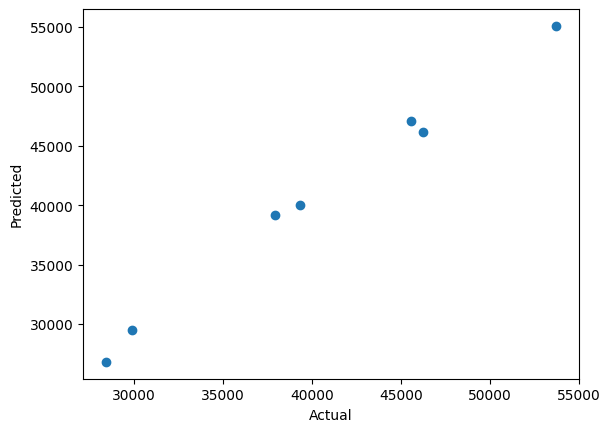

In [8]:
# get a scatter plot of the actual and predicted values
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [9]:
# get mse
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(mse)
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

1253415.9273273344
The mean squared error (MSE) on test set: 1253415.9273


In [41]:
# make country to a string instead of object
df['Country'] = df['Country'].astype(str)
df['Country'] = df['Country'].apply(lambda x: x.replace('\u202f', ''))

In [42]:
df['Country'].unique()

array(['United States', 'Iceland', 'Luxembourg', 'Switzerland',
       'Netherlands', 'Denmark', 'Norway', 'Canada', 'Australia',
       'Belgium', 'Germany', 'Austria', 'Ireland', 'United Kingdom',
       'Sweden', 'Finland', 'France', 'New Zealand', 'South Korea',
       'Slovenia', 'Israel', 'Japan', 'Spain', 'Italy', 'Poland',
       'Lithuania', 'Estonia', 'Czech Republic', 'Latvia', 'Portugal',
       'Greece', 'Chile', 'Hungary', 'Slovakia', 'Mexico'], dtype=object)

In [43]:
# select USA from df
df[df['Country'] == 'United States']

,Country,2000,2005,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,United States,55366,58092,61048,61132,61634,61347,62263,63845,63942,64618,65303,66383,69392


In [51]:
df.head(1)['Country'].values[0]

'United States'

In [52]:
df = pd.read_csv("data/avg_wage.csv")
X = df.iloc[:, 1:-1].values
df['Country'] = df['Country'].astype(str)
df['Country'] = df['Country'].apply(lambda x: x.replace('\u202f', ''))
# sort values with 2020 data
df = df.sort_values(by=['2020'], inplace=True, ascending=False)